In [10]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import importlib

# Speccy
import acf
import psd
import sick_tricks as gary
import utils as ut

In [11]:
importlib.reload(acf)
importlib.reload(psd)
importlib.reload(gary)
importlib.reload(ut);

### First Problem
Select a parameterisation where aliasing is not an issue. There is bias present here (as seen with the bias option in <tt>bochner</tt>).

In [16]:
n = 1000
delta = 0.5
tt = ut.taus(n, delta)
# ff = ut.calc_ff(n)
noise = 0

/Users/00077063/Documents/PostDoc/20230714_speccy/speccy/notebooks/acf.py:17: RuntimeWarning: invalid value encountered in multiply
  K *= K_nu(nu, np.abs(lmbda * dx))


Difference in calculated variance = 7.1419104791248245e-06


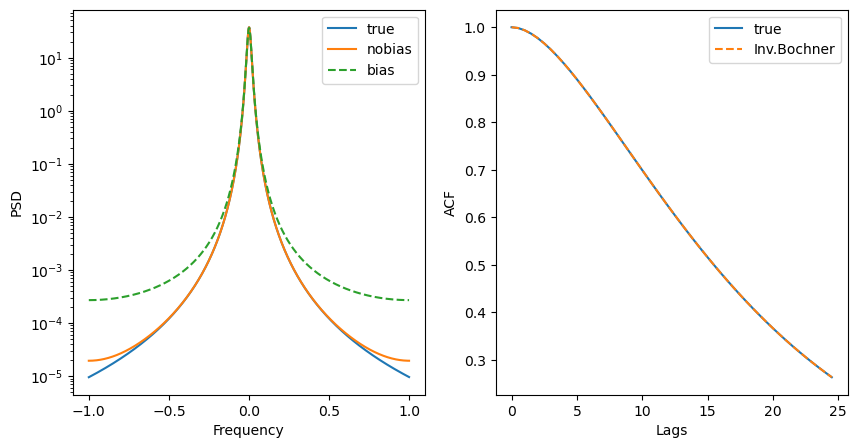

In [17]:
params = [1, 5/6+1, 0.1]

acf_true = acf.matern(tt, params);

ff, S_bias = gary.bochner(acf_true, delta, bias = True)
_, S_nobias = gary.bochner(acf_true, delta, bias = False)
S_true = psd.matern(ff, params)

_, acf_boch = gary.inv_bochner(psd.matern, params, n, delta)

# Error due to aliasing is apparent in variance
print("Difference in calculated variance = " + str(acf_true[0] - acf_boch[0]))

plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.plot(ff, S_true, label="true")
plt.plot(ff, S_nobias, label="nobias")
plt.plot(ff, S_bias, label="bias", linestyle="dashed")
plt.ylabel("PSD")
plt.xlabel("Frequency")
plt.yscale('log')

plt.legend()

plt.subplot(122)
plt.plot(tt[:50], acf_true[:50], label="true")
plt.plot(tt[:50], acf_boch[:50], label="Inv.Bochner", linestyle="dashed")
plt.ylabel("ACF")
plt.xlabel("Lags")
plt.legend();

### Second Problem
Select a parameterisation where aliasing is an issue and there is insignificant bias. Note, these two regimes exist fairly close to each other in parameter space.

Difference in calculated variance = 0.045121769748645235


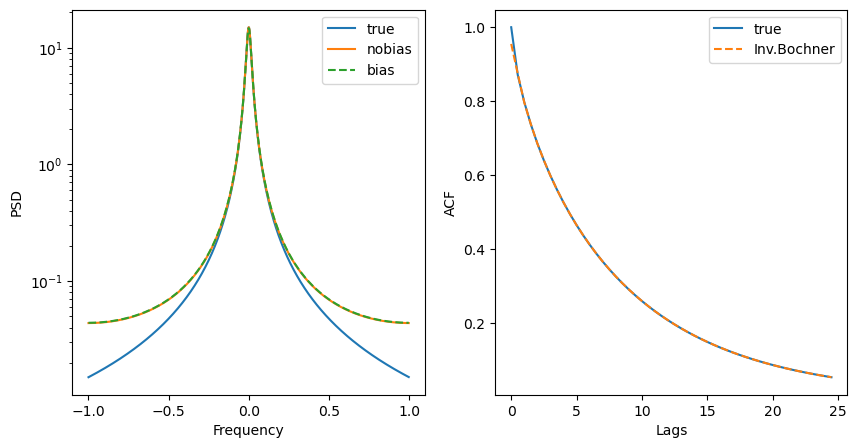

In [18]:
params = [1, 5/6, 0.1]

acf_true = acf.matern(tt, params);

ff, S_bias = gary.bochner(acf_true, delta, bias = True)
_, S_nobias = gary.bochner(acf_true, delta, bias = False)
S_true = psd.matern(ff, params)

_, acf_boch = gary.inv_bochner(psd.matern, params, n, delta)

# Error due to aliasing is apparent in variance
print("Difference in calculated variance = " + str(acf_true[0] - acf_boch[0]))

plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.plot(ff, S_true, label="true")
plt.plot(ff, S_nobias, label="nobias")
plt.plot(ff, S_bias, label="bias", linestyle="dashed")
plt.ylabel("PSD")
plt.xlabel("Frequency")
plt.yscale('log')

plt.legend()

plt.subplot(122)
plt.plot(tt[:50], acf_true[:50], label="true")
plt.plot(tt[:50], acf_boch[:50], label="Inv.Bochner", linestyle="dashed")
plt.ylabel("ACF")
plt.xlabel("Lags")
plt.legend();


### Fix for aliasing
This now should be as simple as setting <tt>alias=True</tt>

Converged with 1279 iterations
Difference in calculated variance, standard = 0.045121769748645235
Difference in calculated variance, aliased = 0.0003829675452823311


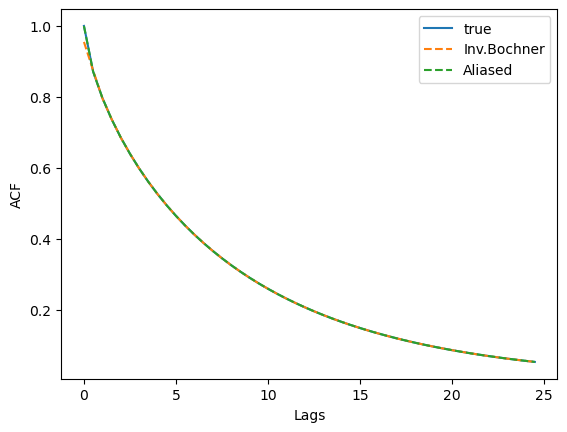

In [19]:
taus, acf_aliased = gary.inv_bochner(psd.matern, params, n, delta, alias=True, tol=1e-7)

print("Difference in calculated variance, standard = " + str(acf_true[0] - acf_boch[0]))
print("Difference in calculated variance, aliased = " + str(acf_true[0] - acf_aliased[0]))

plt.plot(taus[:50], acf_true[:50], label="true")
plt.plot(taus[:50], acf_boch[:50], label="Inv.Bochner", linestyle="dashed")
plt.plot(taus[:50], acf_aliased[:50], label="Aliased", linestyle="dashed")
plt.ylabel("ACF")
plt.xlabel("Lags")
plt.legend();


### Add tapering into workflow

Difference in calculated variance = 1.4210751464460714e-09


/Users/00077063/Documents/PostDoc/20230714_speccy/speccy/notebooks/acf.py:17: RuntimeWarning: invalid value encountered in multiply
  K *= K_nu(nu, np.abs(lmbda * dx))


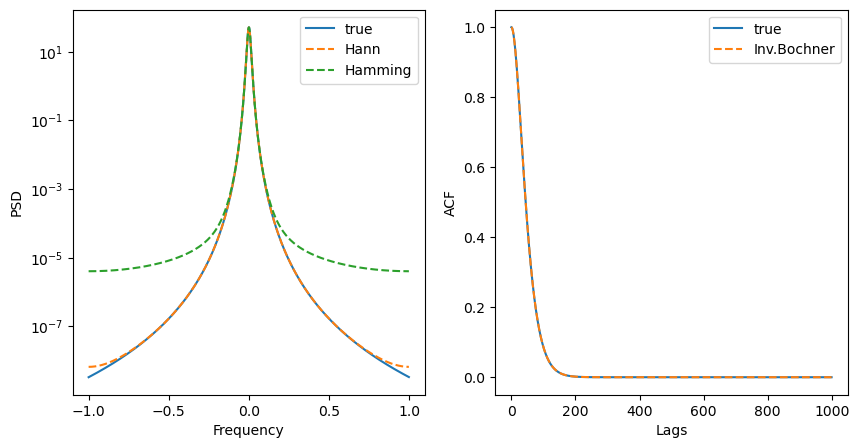

In [21]:
params = [1, 5/6+2, 0.1]

h_hn = signal.windows.hann(n)
h_hm = signal.windows.hamming(n)

acf_true = acf.matern(tt, params);

ff, S_hn = gary.bochner(acf_true, delta, h = h_hn)
_, S_hm = gary.bochner(acf_true, delta, h = h_hm)
S_true = psd.matern(ff, params)

_, acf_calc = gary.inv_bochner(psd.matern, params, n, delta)

# Error due to aliasing is apparent in variance
print("Difference in calculated variance = " + str(acf_true[0] - acf_calc[0]))

plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.plot(ff, S_true, label="true")
plt.plot(ff, S_hn, label="Hann", linestyle="dashed")
plt.plot(ff, S_hm, label="Hamming", linestyle="dashed")
plt.ylabel("PSD")
plt.xlabel("Frequency")
plt.yscale('log')

plt.legend()

plt.subplot(122)
plt.plot(acf_true, label="true")
plt.plot(acf_calc, label="Inv.Bochner", linestyle="dashed")
plt.ylabel("ACF")
plt.xlabel("Lags")
plt.legend();